### Assign Environment

In [55]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


### Import Relate Funtion

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact_manual

# Keras functions
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD 
from keras.optimizers import Adadelta
from keras import losses

# Keras dataset
from keras.datasets import mnist

# Keras utils
from keras.utils import np_utils

### Load Data

In [57]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()

### Reshape Data

In [58]:
x_train = x_train_original.reshape(60000, 28, 28, 1)
x_test = x_test_original.reshape(10000, 28, 28, 1)

In [59]:
x_train.shape

(60000, 28, 28, 1)

In [60]:
x_test.shape

(10000, 28, 28, 1)

### Normalize Data

In [61]:
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min())

### One-Hot Encoding

In [62]:
y_train = np_utils.to_categorical(y_train_original, 10)
y_test = np_utils.to_categorical(y_test_original, 10)

### Functional API 

In [63]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

### Define Input

In [64]:
x = Input(shape=(28,28,1))

In [65]:
print(x)

Tensor("input_4:0", shape=(?, 28, 28, 1), dtype=float32)


### Define Function

In [70]:
f_1 = Conv2D(8, (5, 5), padding='same')
f_2 = Activation('relu')
f_3 = MaxPooling2D(pool_size=(2, 2))

f_4 = Conv2D(16, (5, 5), padding='same')
f_5 = Activation('relu')
f_6 = MaxPooling2D(pool_size=(2, 2))

f_7 = Conv2D(32, (5, 5), padding='same')
f_8 = Activation('relu')
f_9 = MaxPooling2D(pool_size=(2, 2))

f_10 = Conv2D(64, (5, 5), padding='same')
f_11 = Activation('relu')
f_12 = MaxPooling2D(pool_size=(2, 2))

f_13 = Flatten()
f_14 = Dense(9)
f_15 = Activation('relu')

f_16 = Dense(10)
f_17 = Activation('softmax')

In [71]:
h_1 = f_1(x)

h_2 = f_2(h_1)
h_3 = f_3(h_2)
h_4 = f_4(h_3)
h_5 = f_5(h_4)
h_6 = f_6(h_5)
h_7 = f_7(h_6)
h_8 = f_8(h_7)
h_9 = f_9(h_8)
h_10 = f_10(h_9)
h_11 = f_11(h_10)
h_12 = f_12(h_11)
h_13 = f_13(h_12)
h_14 = f_14(h_13)
h_15 = f_15(h_14)
h_16 = f_16(h_15)
y = f_17(h_16)

In [72]:
model = Model(x, y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        3216      
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 16)          0         
__________

### 將模型可視化

import pydot

from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_mnist_Cnn.png')

 <img src="model_mnist_Cnn.png" alt="drawing" style="width: 200px;"/>

In [73]:
model.compile(loss='categorical_crossentropy',optimizer=Adadelta(lr=0.5),metrics=['accuracy'])
model_first = model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.7508 - acc: 0.7532
Epoch 2/10
60000/60000 [==============================] - 45s 756us/step - loss: 0.1311 - acc: 0.9653
Epoch 3/10
60000/60000 [==============================] - 46s 762us/step - loss: 0.0882 - acc: 0.9758
Epoch 4/10
60000/60000 [==============================] - 45s 751us/step - loss: 0.0694 - acc: 0.9814
Epoch 5/10
60000/60000 [==============================] - 47s 781us/step - loss: 0.0560 - acc: 0.9847
Epoch 6/10
60000/60000 [==============================] - 46s 769us/step - loss: 0.0469 - acc: 0.9876
Epoch 7/10
60000/60000 [==============================] - 45s 755us/step - loss: 0.0401 - acc: 0.9890
Epoch 8/10
60000/60000 [==============================] - 46s 768us/step - loss: 0.0347 - acc: 0.9908
Epoch 9/10
60000/60000 [==============================] - 45s 757us/step - loss: 0.0295 - acc: 0.9920
Epoch 10/10
60000/60000 [==============================] - 46s 764us/step - loss: 

# 儲存model 方便以後載入不用重新訓練

model.save('model_minst_Cnn.h5')  

# 載入model

model = tf.contrib.keras.models.load_model('model_mnist_Cnn.h5')

# 準確率為 99.49 ! 

In [77]:
score = model.evaluate(x_train, y_train, batch_size=10000)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

60000/60000 [==============================] - 21s 347us/step
Loss: 0.019790
準確率: 99.499999


### Plot Accuracy and Error 

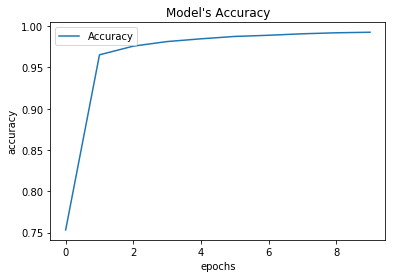

In [78]:
import matplotlib.pyplot as plt

plt.plot(model_first.history['acc'], label='Accuracy')

plt.title("Model's Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc="best")
plt.show()

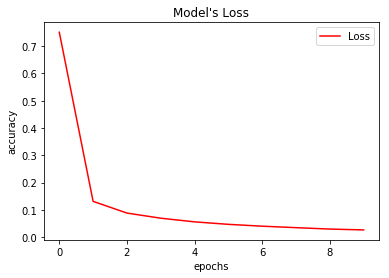

In [79]:
plt.plot(model_first.history['loss'], label='Loss', color="red")

plt.title("Model's Loss")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc="best")
plt.show()

### 這次為Model class 無法使用 predict = model.predict_classes(x_test)

### 但可以使用組合形式預測

In [94]:
predict = model.predict(x_test)
predict=np.argmax(predict,axis=1)
predict

array([7, 2, 1, ..., 4, 5, 6])

### 隨機採取50筆資料 將預測結果與真實資料做比對 

Test Number: 6521
Model predict： 2


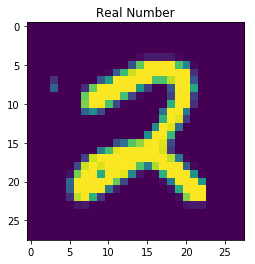

Test Number: 7229
Model predict： 2


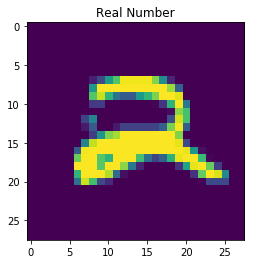

Test Number: 1509
Model predict： 4


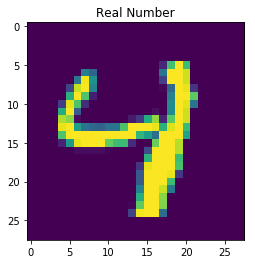

Test Number: 342
Model predict： 1


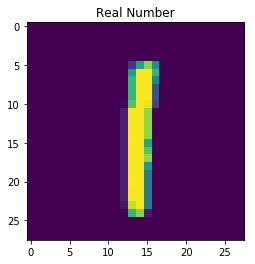

Test Number: 3234
Model predict： 4


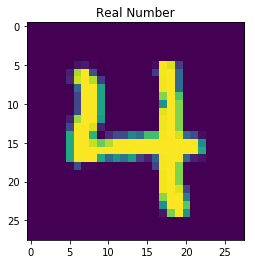

Test Number: 1348
Model predict： 2


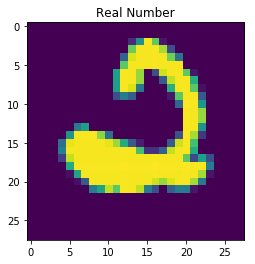

Test Number: 7138
Model predict： 1


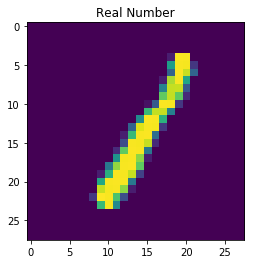

Test Number: 4333
Model predict： 9


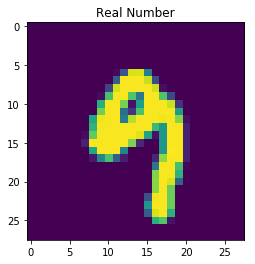

Test Number: 5887
Model predict： 7


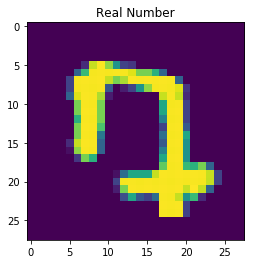

Test Number: 4085
Model predict： 1


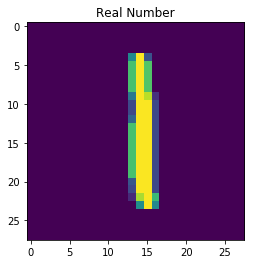

Test Number: 4456
Model predict： 2


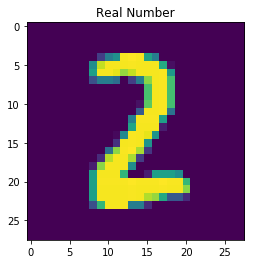

Test Number: 7818
Model predict： 4


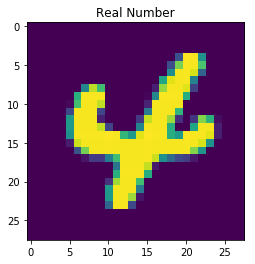

Test Number: 5446
Model predict： 3


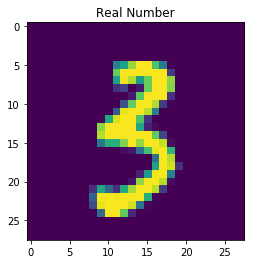

Test Number: 5543
Model predict： 8


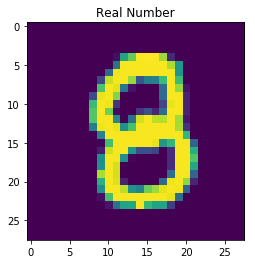

Test Number: 9949
Model predict： 6


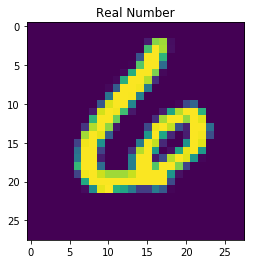

Test Number: 5599
Model predict： 6


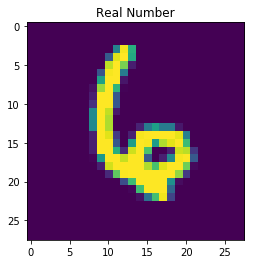

Test Number: 7151
Model predict： 2


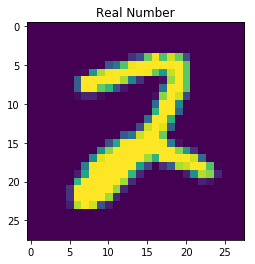

Test Number: 7976
Model predict： 4


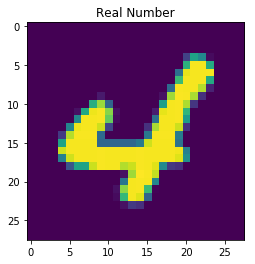

Test Number: 8591
Model predict： 7


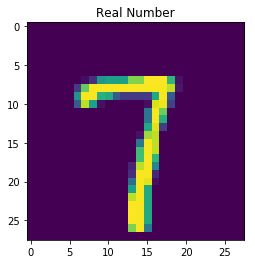

Test Number: 8510
Model predict： 7


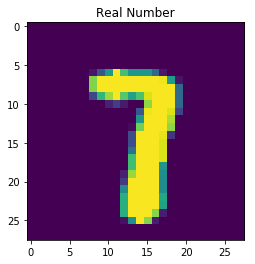

Test Number: 3409
Model predict： 3


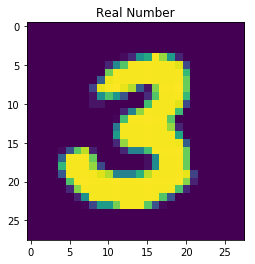

Test Number: 166
Model predict： 4


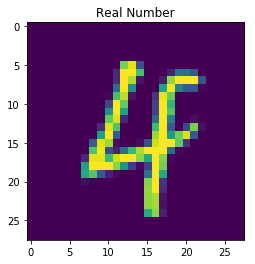

Test Number: 7091
Model predict： 1


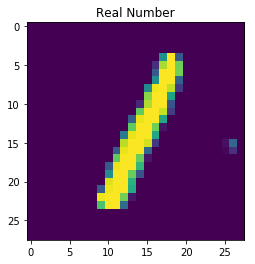

Test Number: 5337
Model predict： 0


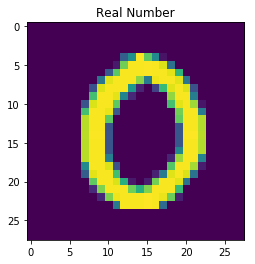

Test Number: 3486
Model predict： 3


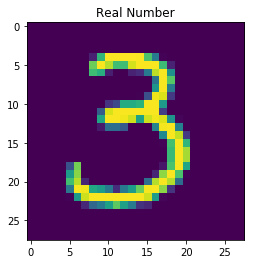

Test Number: 6578
Model predict： 8


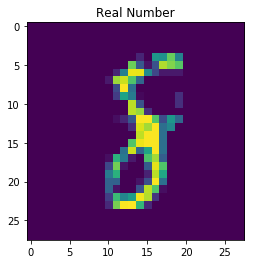

Test Number: 3358
Model predict： 0


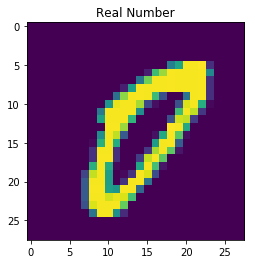

Test Number: 950
Model predict： 7


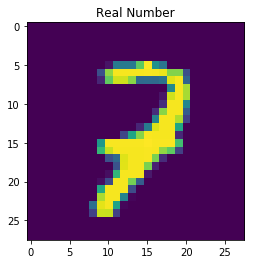

Test Number: 5629
Model predict： 2


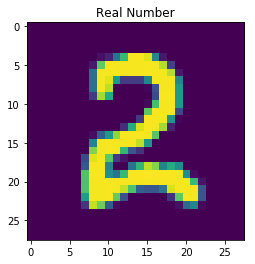

Test Number: 3057
Model predict： 2


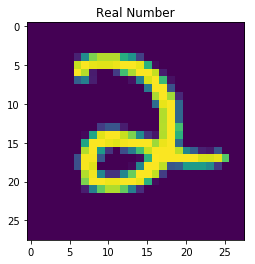

Test Number: 3067
Model predict： 6


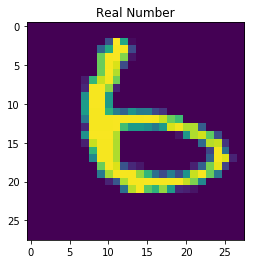

Test Number: 7303
Model predict： 1


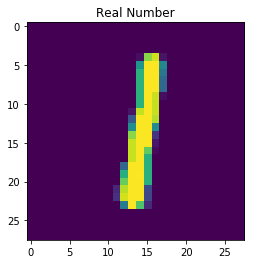

Test Number: 6678
Model predict： 1


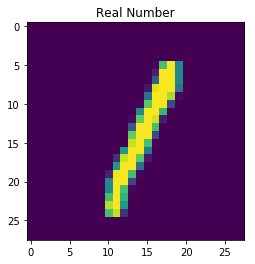

Test Number: 9765
Model predict： 7


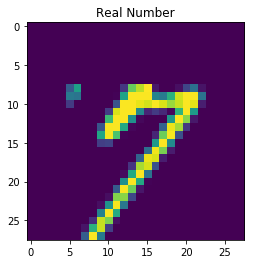

Test Number: 2538
Model predict： 9


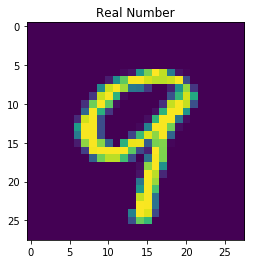

Test Number: 4162
Model predict： 3


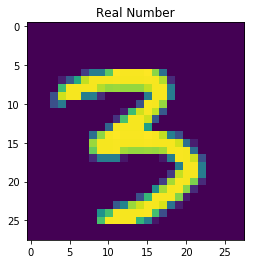

Test Number: 363
Model predict： 2


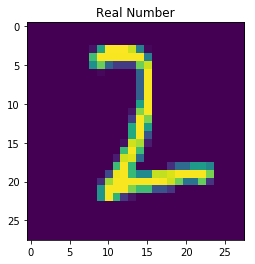

Test Number: 7853
Model predict： 8


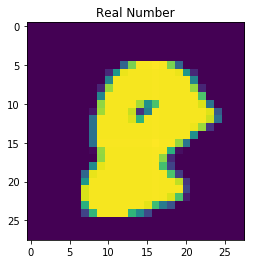

Test Number: 1506
Model predict： 2


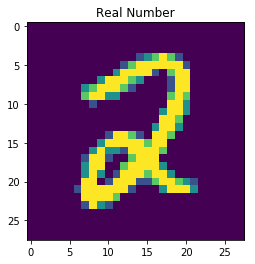

Test Number: 5235
Model predict： 6


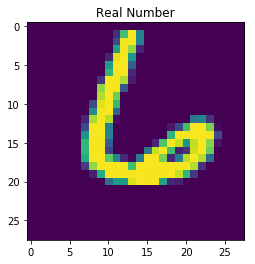

Test Number: 7126
Model predict： 8


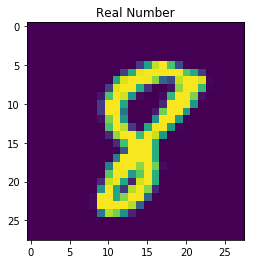

Test Number: 2575
Model predict： 3


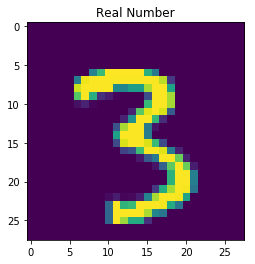

Test Number: 2122
Model predict： 2


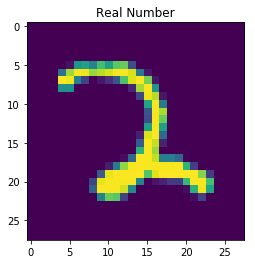

Test Number: 1363
Model predict： 7


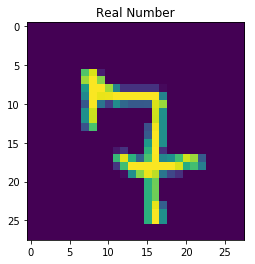

Test Number: 9427
Model predict： 5


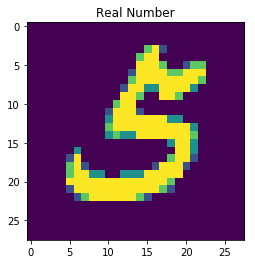

Test Number: 4197
Model predict： 4


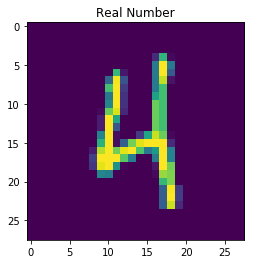

Test Number: 419
Model predict： 1


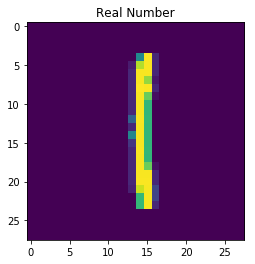

Test Number: 1324
Model predict： 8


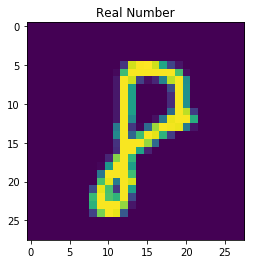

Test Number: 8768
Model predict： 1


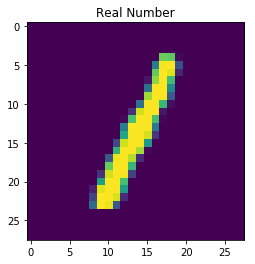

Test Number: 4355
Model predict： 5


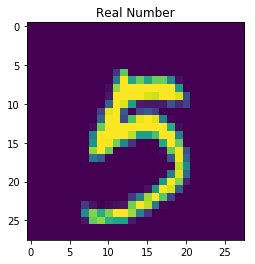

In [97]:
from matplotlib.pyplot import imshow
import random

for x in range(50):
    i = random.randint(1,10000)
    print('Test Number:', i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title("Real Number")
    print('Model predict：',predict[i])
    plt.pause(0.05)
    